#### Import the models

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

#### Import the data

In [2]:
housing_df = pd.read_csv('Housing.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
housing_df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


#### Prepare the data

In [4]:
# Let us write a custom function to encode the categorical attributes.
# This will do Label Binarizer if 2 unique value is present else do dummy transformation.
def convert_to_le(df, cols):
    """
    param: df: Pass the dataframe to transform
    param: cols: Pass the list of columns to transform
    """
    dummy_li = []
    for col_val in cols:
        if df[col_val].nunique() == 2:
            df[col_val] = LabelBinarizer().fit_transform(df[col_val])
        else:
            dummy_li.append(col_val)
    try:
        df = pd.get_dummies(data=df, columns=dummy_li, drop_first=True)
        return df
    except Exception as e:
        print(f'No dummy to convert. {e}')
        return df

In [5]:
#Get categorical columns.
cat_cols = housing_df.select_dtypes(include='object').columns.values

#Transform the data
housing_df_le = convert_to_le(housing_df, cat_cols)
housing_df_le.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0


#### Split the data into train and test and scale it

In [6]:
X = housing_df_le.drop('price',axis=1) # Input
Y = housing_df_le['price'] # Output

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2) # 20% data for testing

In [8]:
# Perform the Min Max scaler on the independent variable
scl = MinMaxScaler()
X_train = scl.fit_transform(X_train) # Fit and transform the train data
X_test = scl.transform(X_test) # Only transform the test data

#### Apply the Statsmodel OLS method

In [9]:
# Linear regression from Statsmodel
X_train_sm = sm.add_constant(X_train) # Add the intercept
sm_linear_model = sm.OLS(Y_train, X_train_sm).fit()

In [10]:
sm_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     72.39
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.09e-98
Time:                        14:35:50   Log-Likelihood:                -6672.0
No. Observations:                 436   AIC:                         1.337e+04
Df Residuals:                     422   BIC:                         1.343e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.08e+06   2.38e+05      8.745      0.000    1.61e+06    2.55e+06
x1          3.351e+06   3.93e+05      8.516      0.000    2.58e+06    4.12e+06
x2          4.741e+05   4.02e+05      1.178      0.239   -3.17e+05    1.26e+06
x3          3.158e+06    3.5e+05      9.033      0.000    2.47e+06    3.85e+06
x4          1.348e+06   2.24e+05      6.021      0.000    9.08e+05    1.79e+06
x5          3.318e+05   1.63e+05      2.037      0.042    1.16e+04    6.52e+05
x6          2.802e+05   1.52e+05      1.848      0.065   -1.78e+04    5.78e+05
x7          3.277e+05   1.23e+05      2.654      0.008     8.5e+04     5.7e+05
x8          1.134e+06   2.56e+05      4.432      0.000    6.31e+05    1.64e+06
x9          9.506e+05   1.23e+05      7.719      0.000    7.09e+05    1.19e+06
x10         9.395e+05      2e+05      4.691      0.000    5.46e+05    1.33e+06
x11         7.594e+05   1.34e+05      5.671      0.000    4.96e+05    1.02e+06
x12        -5.006e+04   1.32e+05     -0.378      0.705    -3.1e+05     2.1e+05
x13        -4.305e+05   1.42e+05     -3.033      0.003   -7.09e+05   -1.52e+05
==============================================================================
Omnibus:                       75.821   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.827
Skew:                           0.850   Prob(JB):                     1.10e-43
Kurtosis:                       5.828   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Do the prediction on Statsmodel 
X_test_sm = sm.add_constant(X_test)
y_pred_sm = sm_linear_model.predict(X_test_sm)

In [12]:
# Get the R2 score.
r2_score(Y_test, y_pred_sm)

0.6155687568772004

#### Apply the sklearn Linear Regression

In [13]:
sk_linear_model = LinearRegression()

In [14]:
sk_linear_model.fit(X_train, Y_train)

LinearRegression()

In [15]:
y_pred_sk = sk_linear_model.predict(X_test)

In [16]:
r2_score(Y_test, y_pred_sk)

0.6155687568771993

#### Model interpretation

In [17]:
# Get the intercept of the model
sk_linear_model.intercept_

# Get the slopes for all variables.
slope_val = [ '%.2f' % elem for elem in sk_linear_model.coef_ ]

In [18]:
slopes =  [f"{str(slope_val)+'*'+col_name}" for slope_val, col_name in zip(slope_val, X.columns.values)]
linear_regression_equation = ' + '.join(slopes) + " + " +str(sk_linear_model.intercept_)

In [19]:
print(linear_regression_equation)

3350518.06*area + 474082.39*bedrooms + 3158330.70*bathrooms + 1347534.04*stories + 331768.74*mainroad + 280166.79*guestroom + 327737.55*basement + 1133559.76*hotwaterheating + 950584.72*airconditioning + 939519.86*parking + 759435.41*prefarea + -50055.69*furnishingstatus_semi-furnished + -430482.65*furnishingstatus_unfurnished + 2079694.0390740186


#### Validating Assumptions

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set(style='whitegrid')

1. Linear dependency between input and target variable.

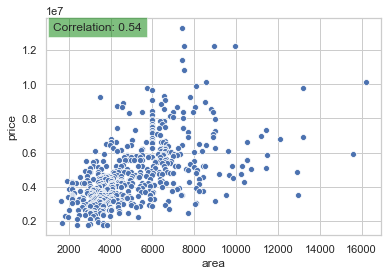

In [21]:
fig = sns.scatterplot(data=housing_df, x="area", y="price")
cor = housing_df[['area','price']].corr().iloc[0,1]
fig.text(0.02, 0.98, f"Correlation: {cor:.2f}", ha="left", va="top", 
         transform=fig.transAxes, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 5})
plt.show()

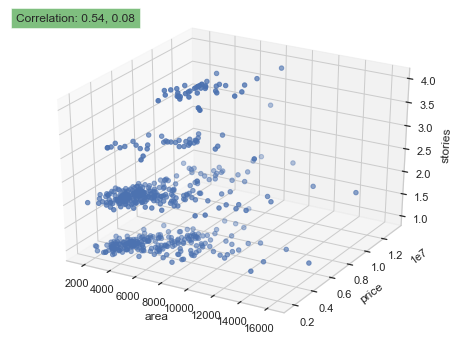

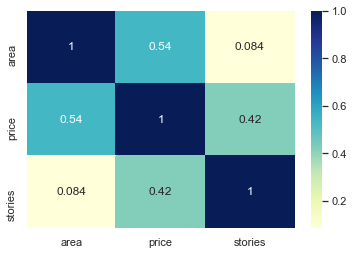

In [22]:
# Plot the 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("area")
ax.set_ylabel("price")
ax.set_zlabel("stories")
x,y,z = housing_df[['area','price','stories']].T.values
ax.scatter(x, y, z)
cor = housing_df[['area','price','stories']].corr()
cor_st = ', '.join([str(f'{i:.2f}') for i in cor.iloc[0,1:]])
fig.text(0.02, 0.98, f"Correlation: {cor_st}", ha="left", va="top", 
         transform=ax.transAxes, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 5})
plt.show()

#plot the heatmpap
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

2 and 3. Error terms are normally distributed and are independent to each other(No Autocorrelation)

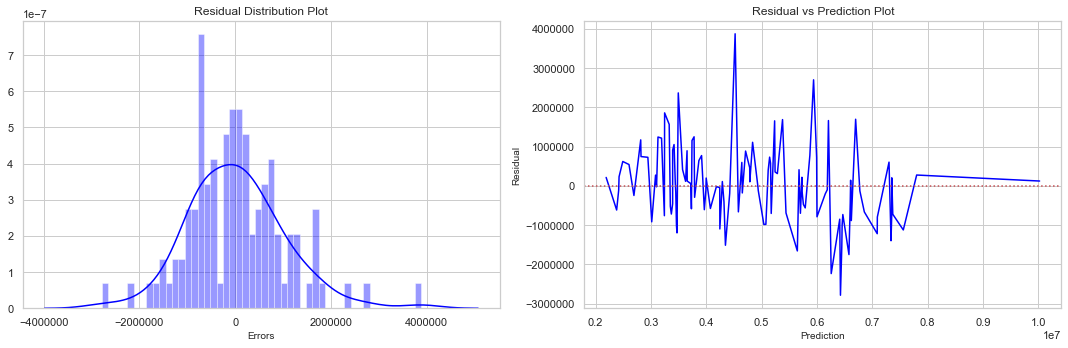

In [23]:
# Plot to verify the normal distribution and independence of error terms
res = Y_test - y_pred_sk
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(res, bins = 50,color='blue')
plt.xlabel('Errors', fontsize = 10)  
plt.title('Residual Distribution Plot')

plt.subplot(1,2,2)
sns.lineplot(y_pred_sk , res,color = 'blue')
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Residual vs Prediction Plot')
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Residual', fontsize = 10)
plt.tight_layout()
plt.show()

4. Homoscedasticity- Error terms have constant variance

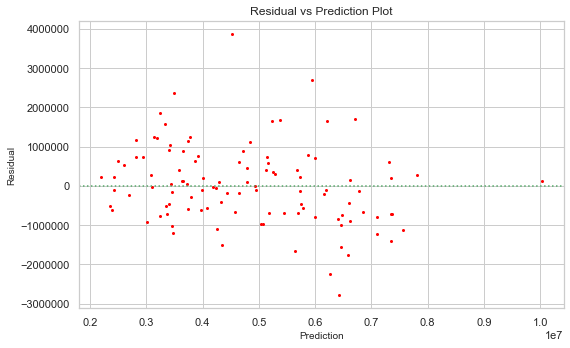

In [24]:
# Plot to check the Homoscedasticity
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.scatter(y_pred_sk, res,s=4, color = 'red')
plt.axhline(y=0, color='g', linestyle=':')
plt.title('Residual vs Prediction Plot')
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Residual', fontsize = 10)
plt.tight_layout()
plt.show()

5. Multicollinearity

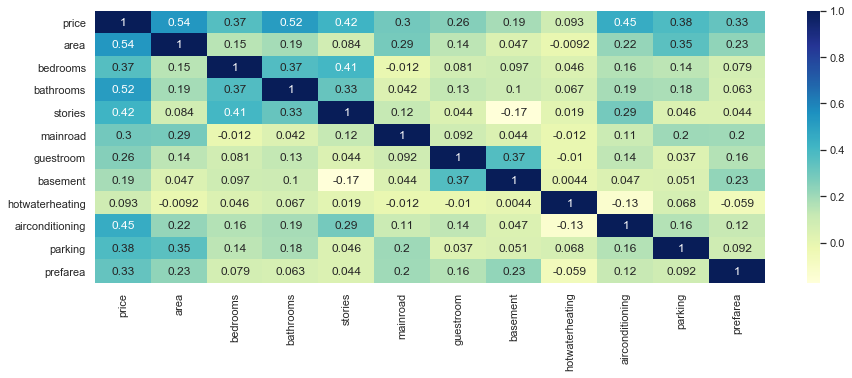

In [25]:
# Plot heat map
plt.figure(figsize=(15,5))
cor = housing_df.corr()
#plot the heatmpap
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

#### Ridge regression

In [26]:
ridge = Ridge(alpha=0.1) #Alpha is tunable parameter
ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [27]:
y_pred_test = ridge.predict(X_test)
r2_rid = r2_score(Y_test, y_pred_test)
print(r2_rid)

0.6159427102197117


#### Lasso Regression

In [28]:
lasso = Lasso(alpha=0.01) # Alpha is tunable parameter
lasso.fit(X_train, Y_train)

Lasso(alpha=0.01)

In [29]:
y_pred_test = lasso.predict(X_test)
r2_las = r2_score(Y_test, y_pred_test)
print(r2_las)

0.6155687710196112
